# TCRE calculation with FaIR

The transient climate response to cumulative emissions of carbon dioxide (TCRE) is the ratio of the globally averaged surface temperature change per unit carbon dioxide (CO2) emitted. It is calculated here using the FaIR climate emulator with either a step emission scenario or a 1\% growth scenario.

In [1]:
# Import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aerometrics.utils.functions import emission_profile_function
from aerometrics.climate_models.fair_climate_model import FairClimateModel

## Parameters

In [2]:
profile = "step"
#profile = "1% growth"

start_year = 1999
t0 = 2000

if profile == "step":
    unit_value = 10e12 # 10 GtCO2
    time_horizon = 100
elif profile == "1% growth":
    unit_value = 7.8e12 # 10 GtCO2
    time_horizon = 100

end_year = t0 + time_horizon

emission_profile = emission_profile_function(start_year, t0, time_horizon, profile, unit_value)

species_settings = {
    "sensitivity_rf": 1.0, 
    "ratio_erf_rf": 1.0,
    "efficacy_erf": 1.0
}
model_settings = {"rcp": None}

## Temperature increase and cumulative emissions

In [5]:
# Run FaIR
results = FairClimateModel(
    start_year,
    end_year,
    "CO2",
    emission_profile,
    species_settings,
    model_settings
).run()

# Get temperature increase for scenario
temperature = results["temperature"]

# Calculate cumulative emissions corresponding to scenario
cumulative_emissions = np.zeros(time_horizon+1)
cumulative_emissions[1] = emission_profile[1]
for k in range(2, time_horizon+1):
    cumulative_emissions[k] = cumulative_emissions[k-1] + emission_profile[k+1]

/Users/f.pollet/POSTDOC/5 - Tools/AeroMetrics/aerometrics/climate_models/fair_climate_model.py:532: UserWarning: RCP scenario not recognized (available: RCP26, RCP45, RCP60, RCP85). Background species will be set to zero.
  warnings.warn("RCP scenario not recognized (available: RCP26, RCP45, RCP60, RCP85). "


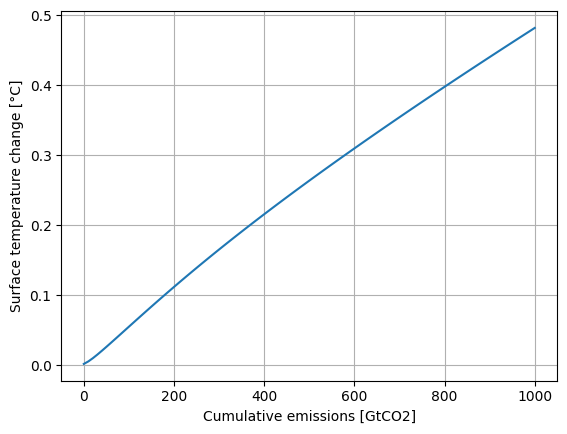

In [6]:
# Plot cumulative emissions as a function of temperature increase
plt.plot(cumulative_emissions/1e12, temperature[t0-start_year:end_year])
plt.xlabel('Cumulative emissions [GtCO2]')
plt.ylabel('Surface temperature change [°C]')
plt.grid()

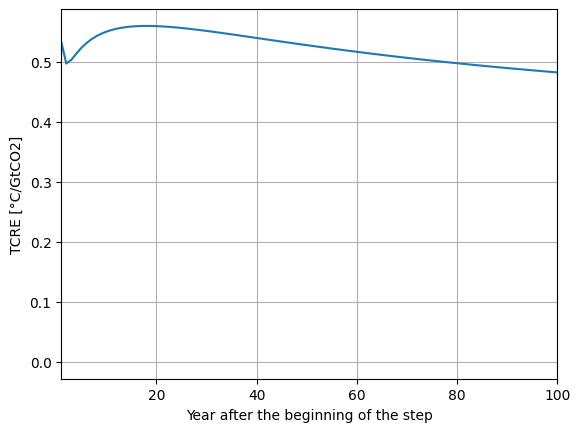

In [7]:
# Calculate tcre at each time step
tcre = np.zeros(time_horizon+1)
cumulative_emissions_1000giga = cumulative_emissions * 10**(-15)
for k in range(1, time_horizon+1):
    tcre[k] = temperature[t0-start_year+k].item() / cumulative_emissions_1000giga[k]

plt.plot(tcre)
plt.xlabel('Year after the beginning of the step')
plt.ylabel('TCRE [°C/GtCO2]')
plt.xlim(1,time_horizon)
plt.grid()